<a href="https://colab.research.google.com/github/anusha-ammu/assignment-2/blob/main/Copy_of_Multi_Task_learning_in_deep_neural_network_for_healthcare_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - diabetes_accuracy: 0.5100 - diabetes_loss: 5.1607 - heart_disease_accuracy: 0.5030 - heart_disease_loss: 11.7250 - loss: 16.8857 - val_diabetes_accuracy: 0.5100 - val_diabetes_loss: 0.9255 - val_heart_disease_accuracy: 0.4400 - val_heart_disease_loss: 3.6296 - val_loss: 4.8698
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - diabetes_accuracy: 0.5064 - diabetes_loss: 2.7980 - heart_disease_accuracy: 0.5652 - heart_disease_loss: 4.8147 - loss: 7.6126 - val_diabetes_accuracy: 0.4850 - val_diabetes_loss: 0.7568 - val_heart_disease_accuracy: 0.4400 - val_heart_disease_loss: 2.2344 - val_loss: 3.2315
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - diabetes_accuracy: 0.4870 - diabetes_loss: 2.2818 - heart_disease_accuracy: 0.4792 - heart_disease_loss: 3.2114 - loss: 5.4932 - val_diabetes_accuracy: 0.5100 - val_diabetes_loss: 0.8011 - val_heart_disease_accuracy: 0.4800 - val_heart_disease_loss: 1.0785 - val_loss: 1.9029
Epoch 4/20
25

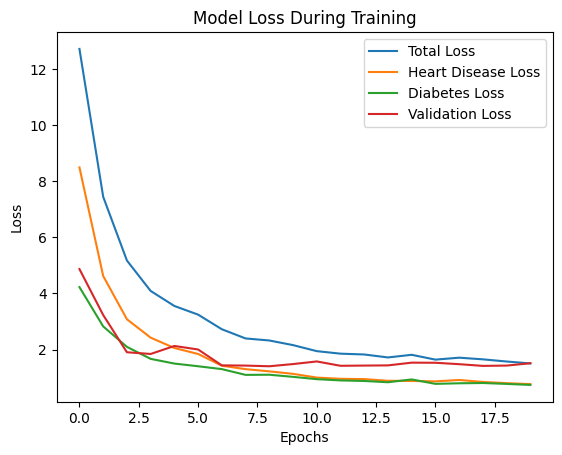

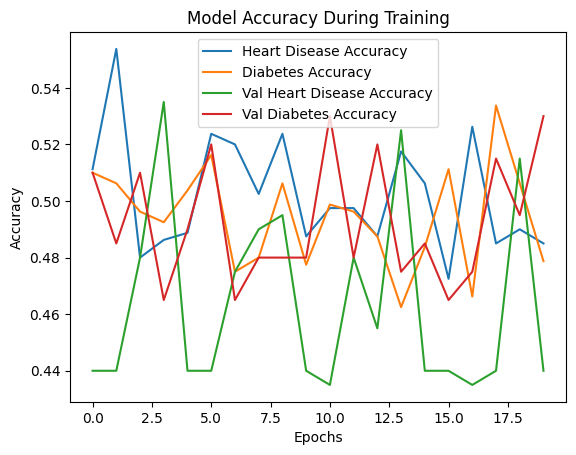

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Sample Predictions:
   Age  Blood Pressure  Cholesterol  Heart Disease Predicted  \
0   70             113          207                        1   
1   44              89          259                        1   
2   78              96          284                        1   
3   52             100          252                        1   
4   65             120          227                        1   

   Diabetes Predicted  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate

# Step 1: Prepare the data
# Example synthetic dataset for healthcare application
np.random.seed(42)
data = {
    'age': np.random.randint(20, 80, 1000),
    'blood_pressure': np.random.randint(80, 180, 1000),
    'cholesterol': np.random.randint(150, 300, 1000),
    'heart_disease': np.random.randint(0, 2, 1000),
    'diabetes': np.random.randint(0, 2, 1000)
}
df = pd.DataFrame(data)

# Feature and target separation
X = df[['age', 'blood_pressure', 'cholesterol']]
y_heart = df['heart_disease']
y_diabetes = df['diabetes']

# Train-test split
X_train, X_test, y_heart_train, y_heart_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X, y_heart, y_diabetes, test_size=0.2, random_state=42
)

# Step 2: Build the multi-task learning model
def build_multi_task_model(input_shape):
    # Shared input layer
    input_layer = Input(shape=(input_shape,))

    # Shared layers
    shared = Dense(128, activation='relu')(input_layer)
    shared = Dropout(0.3)(shared)
    shared = Dense(64, activation='relu')(shared)

    # Task-specific layers
    heart_output = Dense(1, activation='sigmoid', name='heart_disease')(shared)
    diabetes_output = Dense(1, activation='sigmoid', name='diabetes')(shared)

    # Build the model
    model = Model(inputs=input_layer, outputs=[heart_output, diabetes_output])
    model.compile(
        optimizer='adam',
        loss={'heart_disease': 'binary_crossentropy', 'diabetes': 'binary_crossentropy'},
        metrics={'heart_disease': 'accuracy', 'diabetes': 'accuracy'}
    )
    return model

model = build_multi_task_model(X_train.shape[1])

# Step 3: Train the model
history = model.fit(
    X_train,
    {'heart_disease': y_heart_train, 'diabetes': y_diabetes_train},
    validation_data=(
        X_test,
        {'heart_disease': y_heart_test, 'diabetes': y_diabetes_test}
    ),
    epochs=20,
    batch_size=32
)

# Step 4: Evaluate the model
loss, heart_loss, diabetes_loss, heart_acc, diabetes_acc = model.evaluate(
    X_test, {'heart_disease': y_heart_test, 'diabetes': y_diabetes_test}
)
print(f"Heart Disease Accuracy: {heart_acc:.2f}")
print(f"Diabetes Accuracy: {diabetes_acc:.2f}")

# Step 5: Generate analysis graphs
# Plot loss
plt.plot(history.history['loss'], label='Total Loss')
plt.plot(history.history['heart_disease_loss'], label='Heart Disease Loss')
plt.plot(history.history['diabetes_loss'], label='Diabetes Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['heart_disease_accuracy'], label='Heart Disease Accuracy')
plt.plot(history.history['diabetes_accuracy'], label='Diabetes Accuracy')
plt.plot(history.history['val_heart_disease_accuracy'], label='Val Heart Disease Accuracy')
plt.plot(history.history['val_diabetes_accuracy'], label='Val Diabetes Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 6: Make predictions
predictions = model.predict(X_test)
heart_predictions = (predictions[0] > 0.5).astype(int)
diabetes_predictions = (predictions[1] > 0.5).astype(int)

print("Sample Predictions:")
print(pd.DataFrame({
    'Age': X_test['age'].values,
    'Blood Pressure': X_test['blood_pressure'].values,
    'Cholesterol': X_test['cholesterol'].values,
    'Heart Disease Predicted': heart_predictions.flatten(),
    'Diabetes Predicted': diabetes_predictions.flatten()
}).head())
